In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

----
# 데이터 분석
- 산포도 분석을 통한 Feature Column 선정
- k-means
----

In [6]:
df = pd.read_csv("../../Data/sangwonKim/pop_house_car_inout.csv", index_col='년도')
df.head()

,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
년도,,,,,,,,,
2013,서울특별시,10143645,5007869,5135776,NaN,NaN,38005651,1520090,1620640
2013,부산광역시,3527635,1747000,1780635,NaN,NaN,17380896,478451,496161
2013,대구광역시,2501588,1246071,1255517,NaN,NaN,14583073,351873,363224
2013,인천광역시,2879782,1448835,1430947,NaN,NaN,20097823,461613,439578
2013,광주광역시,1472910,730216,742694,NaN,NaN,8351445,226696,229288


In [8]:
df.dropna(axis=0, inplace=True)
df

,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
년도,,,,,,,,,
2015,서울특별시,10022181,4930943,5091238,2793244.0,79049.0,38005651,1589431,1726687
2015,부산광역시,3513777,1735570,1778207,1164352.0,86626.0,17380896,507031,520591
2015,대구광역시,2487829,1237291,1250538,738100.0,29610.0,14583073,351424,364364
2015,인천광역시,2925815,1469869,1455946,942244.0,47402.0,20097823,473223,463685
2015,광주광역시,1472199,729662,742537,486527.0,26705.0,8351445,224603,233875
...,...,...,...,...,...,...,...,...,...
2021,전라북도,1786855,888994,897861,747880.0,89358.0,11461086,223710,229511
2021,전라남도,1832803,922221,910582,811478.0,116001.0,13688569,223619,228106
2021,경상북도,2626609,1323661,1302948,1103666.0,129848.0,17878739,317866,314529


In [28]:
df_temp = df[df.index == 2021]
df_temp.set_index('시도', inplace=True)
df_temp.head()

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
시도,,,,,,,,
서울특별시,9509458,4618040,4891418,3068494.0,97000.0,38005651,1418187,1524430
부산광역시,3350380,1639044,1711336,1282831.0,101337.0,17380896,441323,460226
대구광역시,2385412,1175632,1209780,815588.0,36121.0,14583073,304761,329080
인천광역시,2948375,1476373,1472002,1053451.0,62748.0,20097823,433137,421714
광주광역시,1441611,713015,728596,542703.0,33439.0,8351445,212888,218771


In [29]:
df_km = df_temp[['주택수','빈집수','자동차등록대수','전입인구','전출인구']]
df_km.head()

,주택수,빈집수,자동차등록대수,전입인구,전출인구
시도,,,,,
서울특별시,3068494.0,97000.0,38005651,1418187,1524430
부산광역시,1282831.0,101337.0,17380896,441323,460226
대구광역시,815588.0,36121.0,14583073,304761,329080
인천광역시,1053451.0,62748.0,20097823,433137,421714
광주광역시,542703.0,33439.0,8351445,212888,218771


In [54]:
data_points = df_km.values
km = KMeans(n_clusters=5).fit(data_points) # n_clusters 에 값을 정해주기!

In [55]:
# 각 군집의 중심위치
km.cluster_centers_ # _(언더바)가 있는건 시스템에서 제공해주는것임

array([[4.14826667e+05, 3.58575000e+04, 7.20693517e+06, 1.57221167e+05,
        1.57855333e+05, 1.00000000e+00],
       [4.60812600e+06, 2.42181000e+05, 7.33935150e+07, 2.03621500e+06,
        1.88569800e+06, 2.00000000e+00],
       [1.18655275e+06, 1.08129750e+05, 1.92818680e+07, 3.91777000e+05,
        3.96238500e+05, 3.00000000e+00],
       [3.06849400e+06, 9.70000000e+04, 3.80056510e+07, 1.41818700e+06,
        1.52443000e+06, 0.00000000e+00],
       [7.79967200e+05, 8.16822000e+04, 1.28564420e+07, 2.49717000e+05,
        2.54241600e+05, 2.20000000e+00]])

In [56]:
km.labels_

array([3, 2, 4, 2, 0, 0, 0, 0, 1, 0, 4, 4, 4, 4, 2, 2, 0], dtype=int32)

In [57]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df_km['cluster_id'] = km.labels_
df_km

,주택수,빈집수,자동차등록대수,전입인구,전출인구,cluster_id
시도,,,,,,
서울특별시,3068494.0,97000.0,38005651,1418187,1524430,3
부산광역시,1282831.0,101337.0,17380896,441323,460226,2
대구광역시,815588.0,36121.0,14583073,304761,329080,4
인천광역시,1053451.0,62748.0,20097823,433137,421714,2
광주광역시,542703.0,33439.0,8351445,212888,218771,0
대전광역시,501218.0,26005.0,8274122,211565,220496,0
울산광역시,396893.0,29293.0,6948158,129880,143554,0
세종특별자치시,143798.0,13223.0,2164838,76912,62827,0
경기도,4608126.0,242181.0,73393515,2036215,1885698,1


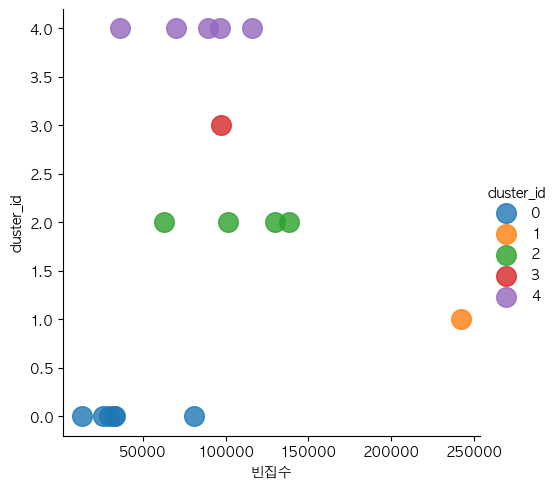

In [85]:
sns.lmplot(x='빈집수', y='cluster_id',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

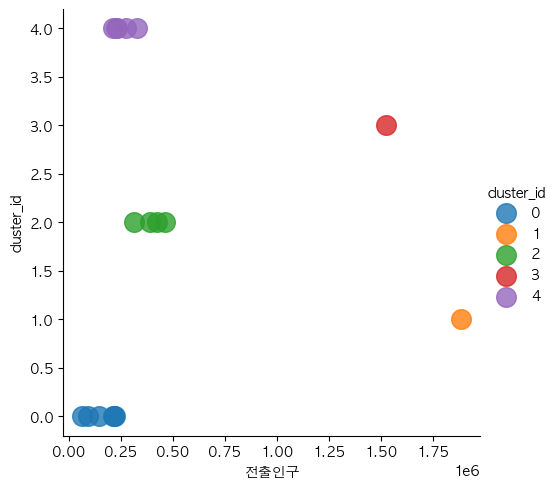

In [84]:
sns.lmplot(x='전출인구', y='cluster_id',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

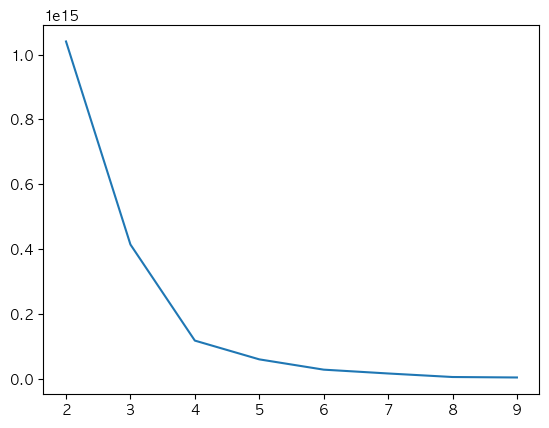

In [39]:
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_km)
    scores.append(km.inertia_)

plt.plot(range(2,10), scores)
plt.show()
# elbow point > 꺽이는 부분

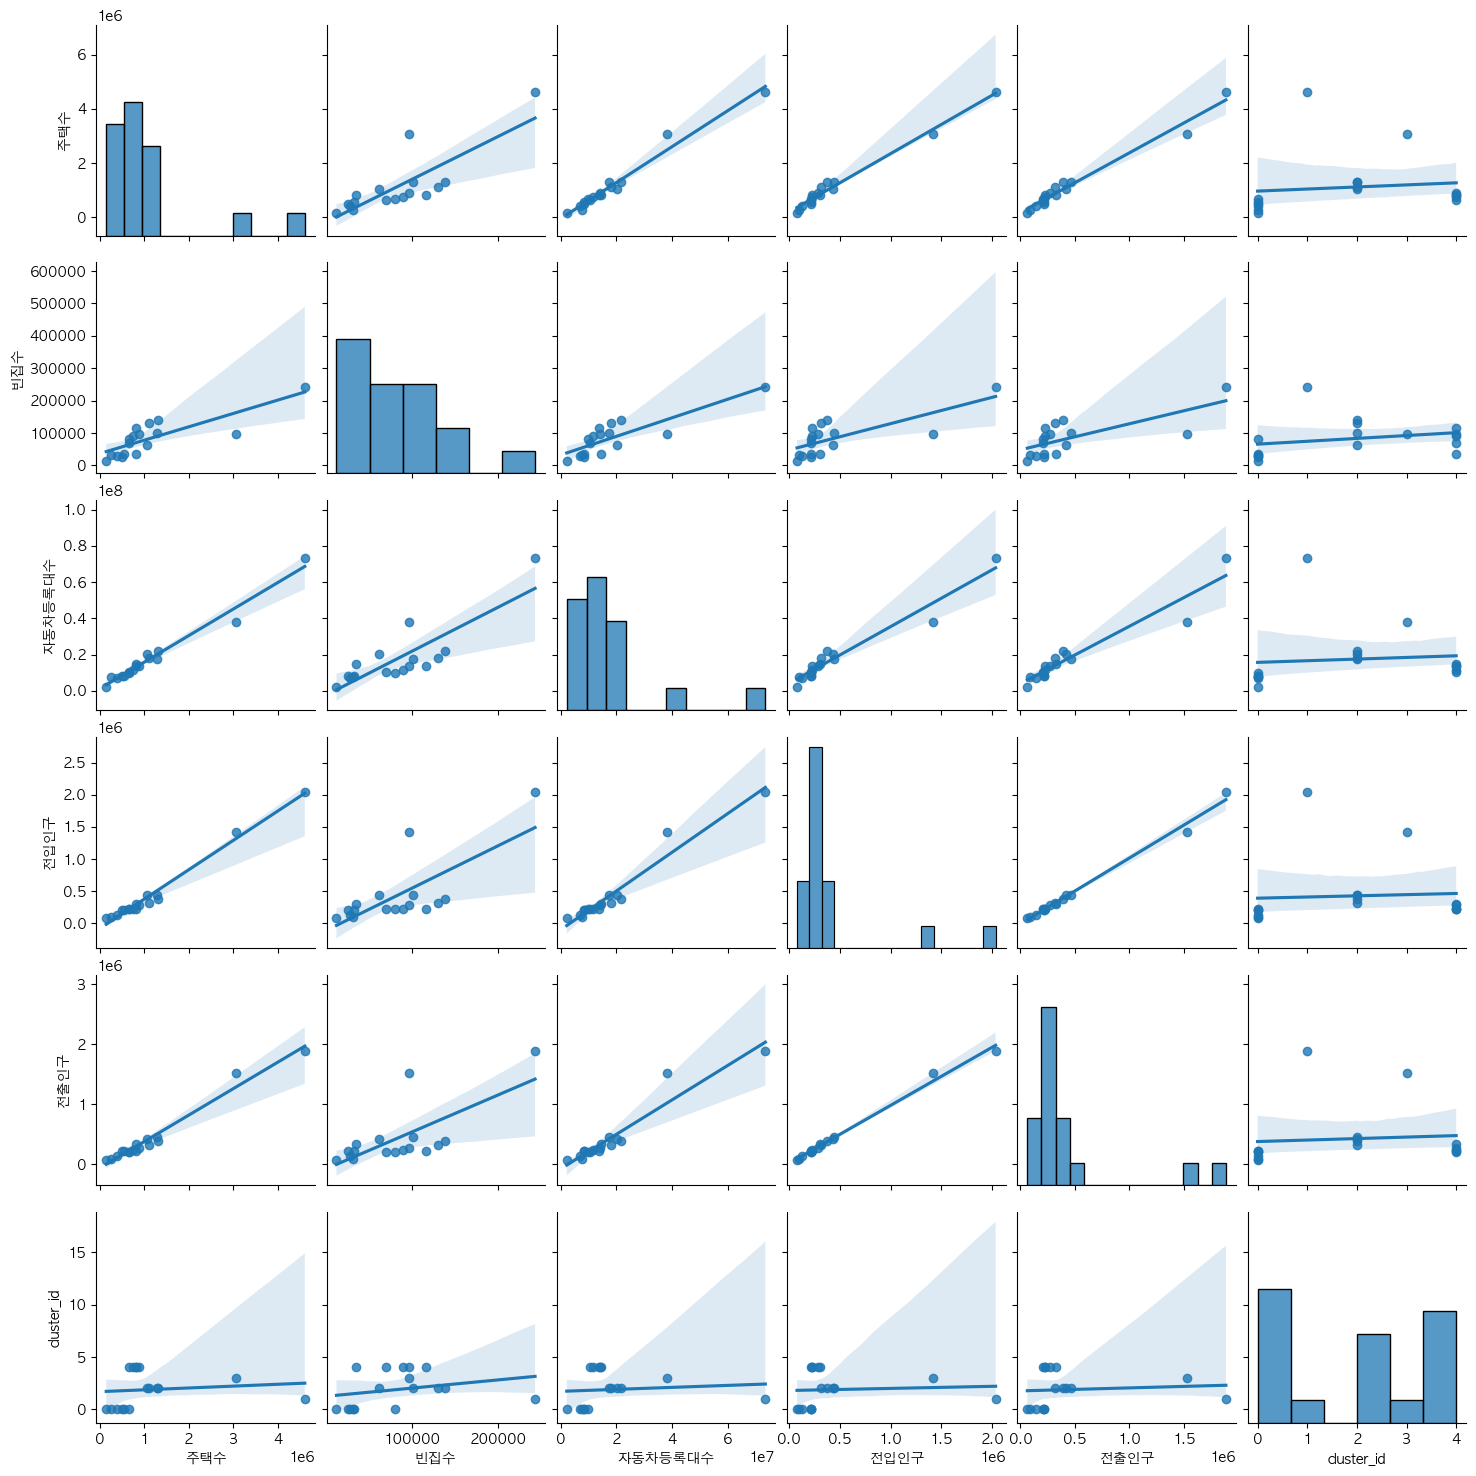

In [88]:
# 총 인구, 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
sns.pairplot(
    df_km,
    # vars = df_2020_norm.columns[:5],
    vars = df_km.columns,
    # vars = df_2020_norm.columns[:5],
    kind = 'reg'
)
plt.show()

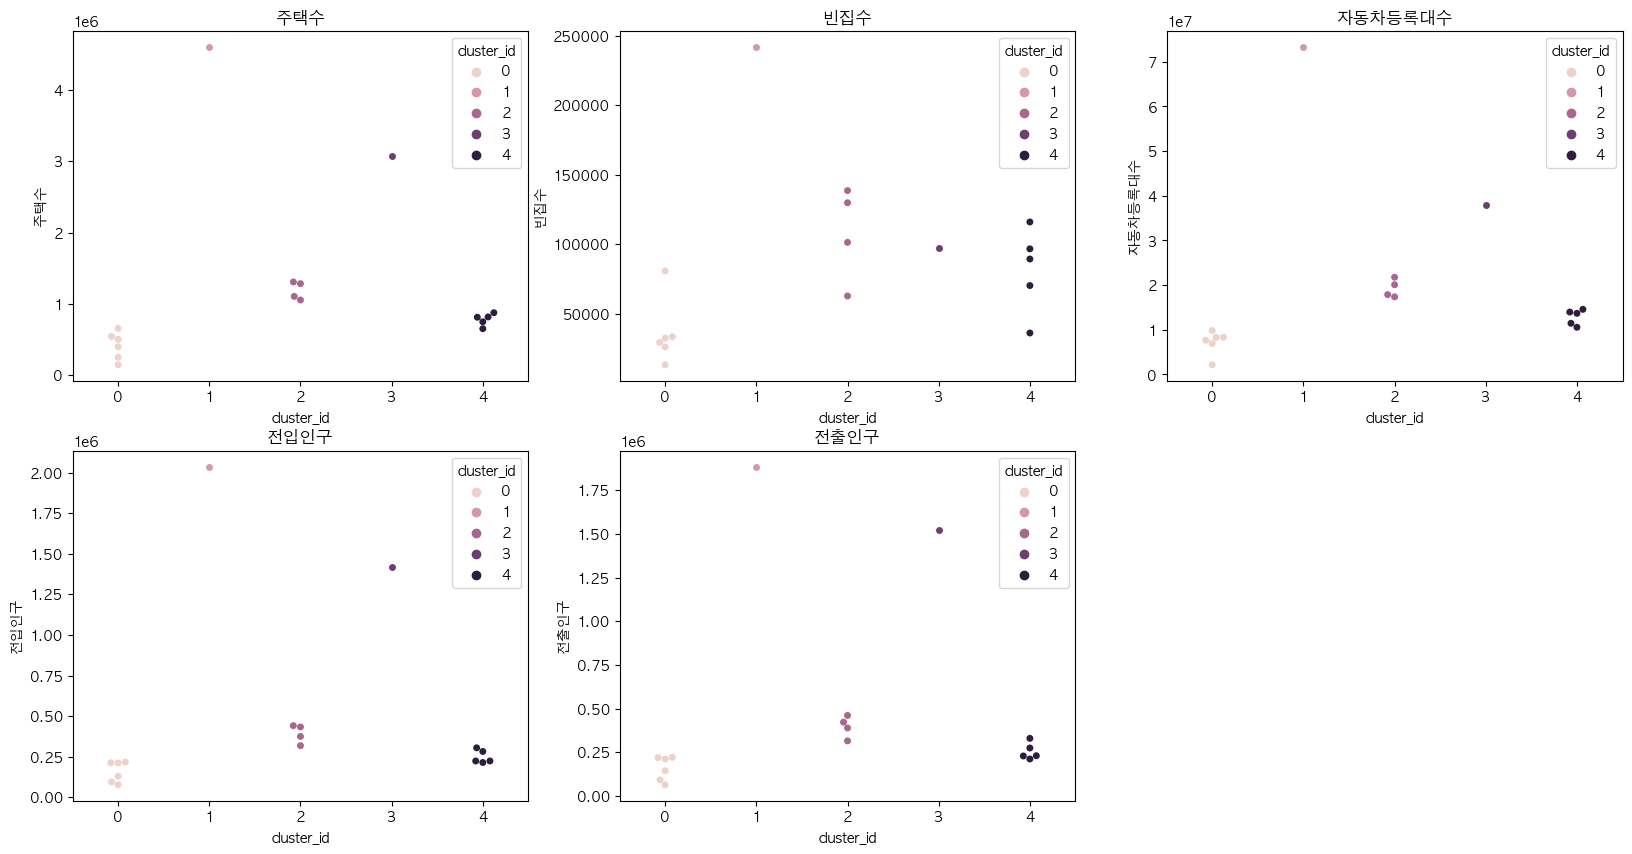

In [87]:
# 주택수	빈집수	자동차등록대수	전입인구	전출인구

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

sns.swarmplot(
    x='cluster_id',
    y='주택수',
    data=df_km,
    ax=ax1,
    hue='cluster_id',
    legend=True
)
sns.swarmplot(
    x='cluster_id',
    y='빈집수',
    data=df_km,
    ax=ax2,
    hue='cluster_id',
    legend=True
)
sns.swarmplot(
    x='cluster_id',
    y='자동차등록대수',
    data=df_km,
    ax=ax3,
    hue='cluster_id',
    legend=True
)
sns.swarmplot(
    x='cluster_id',
    y='전입인구',
    data=df_km,
    ax=ax4,
    hue='cluster_id',
    legend=True
)

sns.swarmplot(
    x='cluster_id',
    y='전출인구',
    data=df_km,
    ax=ax5,
    hue='cluster_id',
    legend=True
)

ax1.set_title('주택수') # 산포도
ax2.set_title('빈집수') # 산포도 : 어디에 data가 많이 있는지 보여줌
ax3.set_title('자동차등록대수')
ax4.set_title('전입인구')
ax5.set_title('전출인구')

plt.show()

In [22]:
# 정확도 측정하기(feat. 세련되게)
from sklearn.metrics import accuracy_score
accuracy_score(df_km.label, df_km.cluster_id)

AttributeError: 'DataFrame' object has no attribute 'label'

----

In [11]:
df_km = df[df.index == 2021].iloc[:,1:]
km = KMeans(n_clusters=5, random_state=42)
km.fit(df_km)

KMeans(n_clusters=5, random_state=42)

In [12]:
# 군집화한 Label 출력
km.labels_ # 타겟이 없으니까 그냥 01234로 나타낸것

array([3, 2, 4, 2, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 2, 2, 0], dtype=int32)

In [13]:
# 군집화한 Cluster갯수와 확인
np.unique(km.labels_, return_counts=True) # return_count : unique한 갯수를 보여 준다.
# 0번이 5개, 1번이 1개, 2번이 4개, 3번:1개, 4번:6개
# 틀린갯수 확인 가능

(array([0, 1, 2, 3, 4], dtype=int32), array([5, 1, 4, 1, 6]))

In [14]:
# Cluster 0이 5개인지 확인
count0 = 0
for i in km.labels_:
    if i==0:
        count0+=1

print(count0)
# 0번이 5개란 소리임

5
